## Import Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

### Read data

In [2]:
data = pd.read_csv("churn.csv")
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5552,6072-NUQCB,Male,0,Yes,Yes,22,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.25,488.25,No
2582,7145-FEJWU,Female,0,No,Yes,12,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.30,1275.65,No
190,7100-FQPRV,Male,0,Yes,Yes,43,Yes,Yes,DSL,Yes,...,No,Yes,No,Yes,One year,Yes,Credit card (automatic),71.90,3173.35,No
2744,0815-MFZGM,Female,0,Yes,No,42,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),99.00,4135,No
2796,0058-EVZWM,Female,0,Yes,No,55,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),89.80,4959.6,No


### Exploratory data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


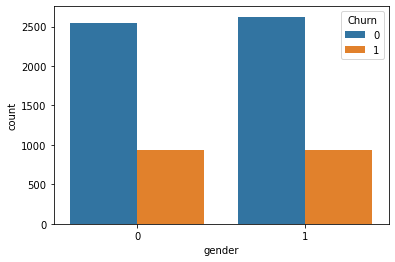

In [51]:
sns.countplot(data=df, x="gender", hue="Churn")
plt.show()

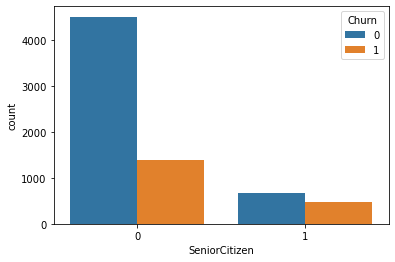

In [59]:
sns.countplot(data=df, x="SeniorCitizen", hue="Churn")
plt.show()

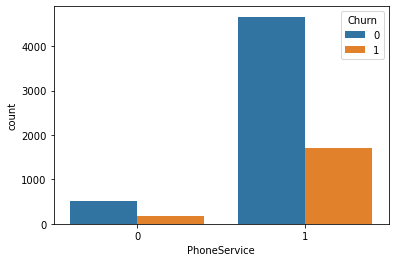

In [60]:
sns.countplot(data=df, x="PhoneService", hue="Churn")
plt.show()

In [4]:
data.shape

(7043, 21)

In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# distribution of customers who churn

data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [7]:
# check the nulls
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# Compare the values for both churns
data.groupby('Churn').mean()

,SeniorCitizen,tenure,MonthlyCharges
Churn,,,
No,0.128721,37.569965,61.265124
Yes,0.254682,17.979133,74.441332


Frauds transactions are more than the legit transactions

### Data Preprocessing

In [9]:
df = data.copy()

In [10]:
## Encoding the data
from sklearn.preprocessing import LabelEncoder

cat_cols =[x for x in df.columns if df[x].dtype=="object"]

le=LabelEncoder()

df = df.apply(lambda cat_cols: le.fit_transform(cat_cols.astype(str)), axis=0, result_type='expand')

In [11]:
df.drop(columns="customerID",inplace=True)

In [12]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2857,0,0,1,1,42,1,0,0,0,2,0,2,0,2,2,0,0,908,2603,0
5898,0,0,1,1,27,1,2,2,1,1,1,1,1,1,1,0,1,379,6025,0
6161,1,0,0,0,67,1,0,1,2,0,0,0,0,0,0,0,3,1098,4456,0
1540,1,0,1,1,60,1,0,1,0,2,2,0,0,0,0,1,1,1210,4135,0
449,1,0,1,1,70,1,0,1,2,2,0,2,2,2,2,0,0,104,5832,0


In [13]:
X = df.drop(columns = 'Churn',axis = 1)
y = df['Churn']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            7043 non-null   int32
 1   SeniorCitizen     7043 non-null   int32
 2   Partner           7043 non-null   int32
 3   Dependents        7043 non-null   int32
 4   tenure            7043 non-null   int32
 5   PhoneService      7043 non-null   int32
 6   MultipleLines     7043 non-null   int32
 7   InternetService   7043 non-null   int32
 8   OnlineSecurity    7043 non-null   int32
 9   OnlineBackup      7043 non-null   int32
 10  DeviceProtection  7043 non-null   int32
 11  TechSupport       7043 non-null   int32
 12  StreamingTV       7043 non-null   int32
 13  StreamingMovies   7043 non-null   int32
 14  Contract          7043 non-null   int32
 15  PaperlessBilling  7043 non-null   int32
 16  PaymentMethod     7043 non-null   int32
 17  MonthlyCharges    7043 non-null  

### Modelling

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y, random_state = 23)
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(5634, 19) (1409, 19) (5634,) (1409,)


In [17]:
lr =  LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [18]:
preds = lr.predict(X_test)

In [19]:
pred = accuracy_score(preds, y_test)
pred

0.7714691270404542

In [20]:
# Create new data out of the samples
df.to_csv("data1.csv")
df.to_csv("data2.csv")

In [62]:
# shuffle the data

df_shuffled = shuffle(df, random_state=42)

In [39]:
sample_size = 3522
s_size = 7000

In [40]:
sample1 = df_shuffled[:sample_size].copy()

In [44]:
sample2 = df_shuffled[sample_size:].copy()

In [42]:
sample1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,392,2044,1
2715,1,0,0,0,36,1,2,2,1,1,1,1,1,1,0,1,0,401,6522,0
3825,0,0,1,1,48,1,0,2,1,1,1,1,1,1,2,0,3,320,67,0
1807,0,0,0,0,1,1,0,1,0,0,2,0,0,0,0,0,2,1138,5822,1
132,1,0,0,0,64,1,0,0,0,0,0,2,0,0,2,0,0,691,2837,0


In [45]:
sample2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2767,0,0,0,1,41,1,2,1,0,0,2,2,0,0,0,1,0,1295,3384,0
4712,1,0,1,1,46,1,2,1,2,2,2,0,2,2,1,1,2,155,4512,0
6064,1,0,0,0,1,0,1,0,0,0,0,0,2,2,0,1,3,615,3816,1
942,1,0,0,0,17,1,0,1,0,0,0,0,0,2,0,1,1,1201,1628,0
1036,1,0,1,1,65,1,2,1,2,2,2,2,2,2,2,1,0,259,5934,0


In [46]:
# Create new data out of the samples
sample1.to_csv("data1.csv")
sample2.to_csv("data2.csv")

In [57]:
df1 = df_shuffled[df_shuffled['gender'] == 0] 
df2 = df_shuffled[df_shuffled['gender'] == 1] 
print(df1.shape)
print(df2.shape)

(3488, 20)
(3555, 20)


In [58]:
# Create new data out of the samples
df1.to_csv("data3.csv")
df2.to_csv("data4.csv")

In [63]:
df_shuffled.to_csv("data5.csv")